In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/home/bhawesh/Programming/Capstone Project/Dataset/gallstone_.csv")
data.head()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


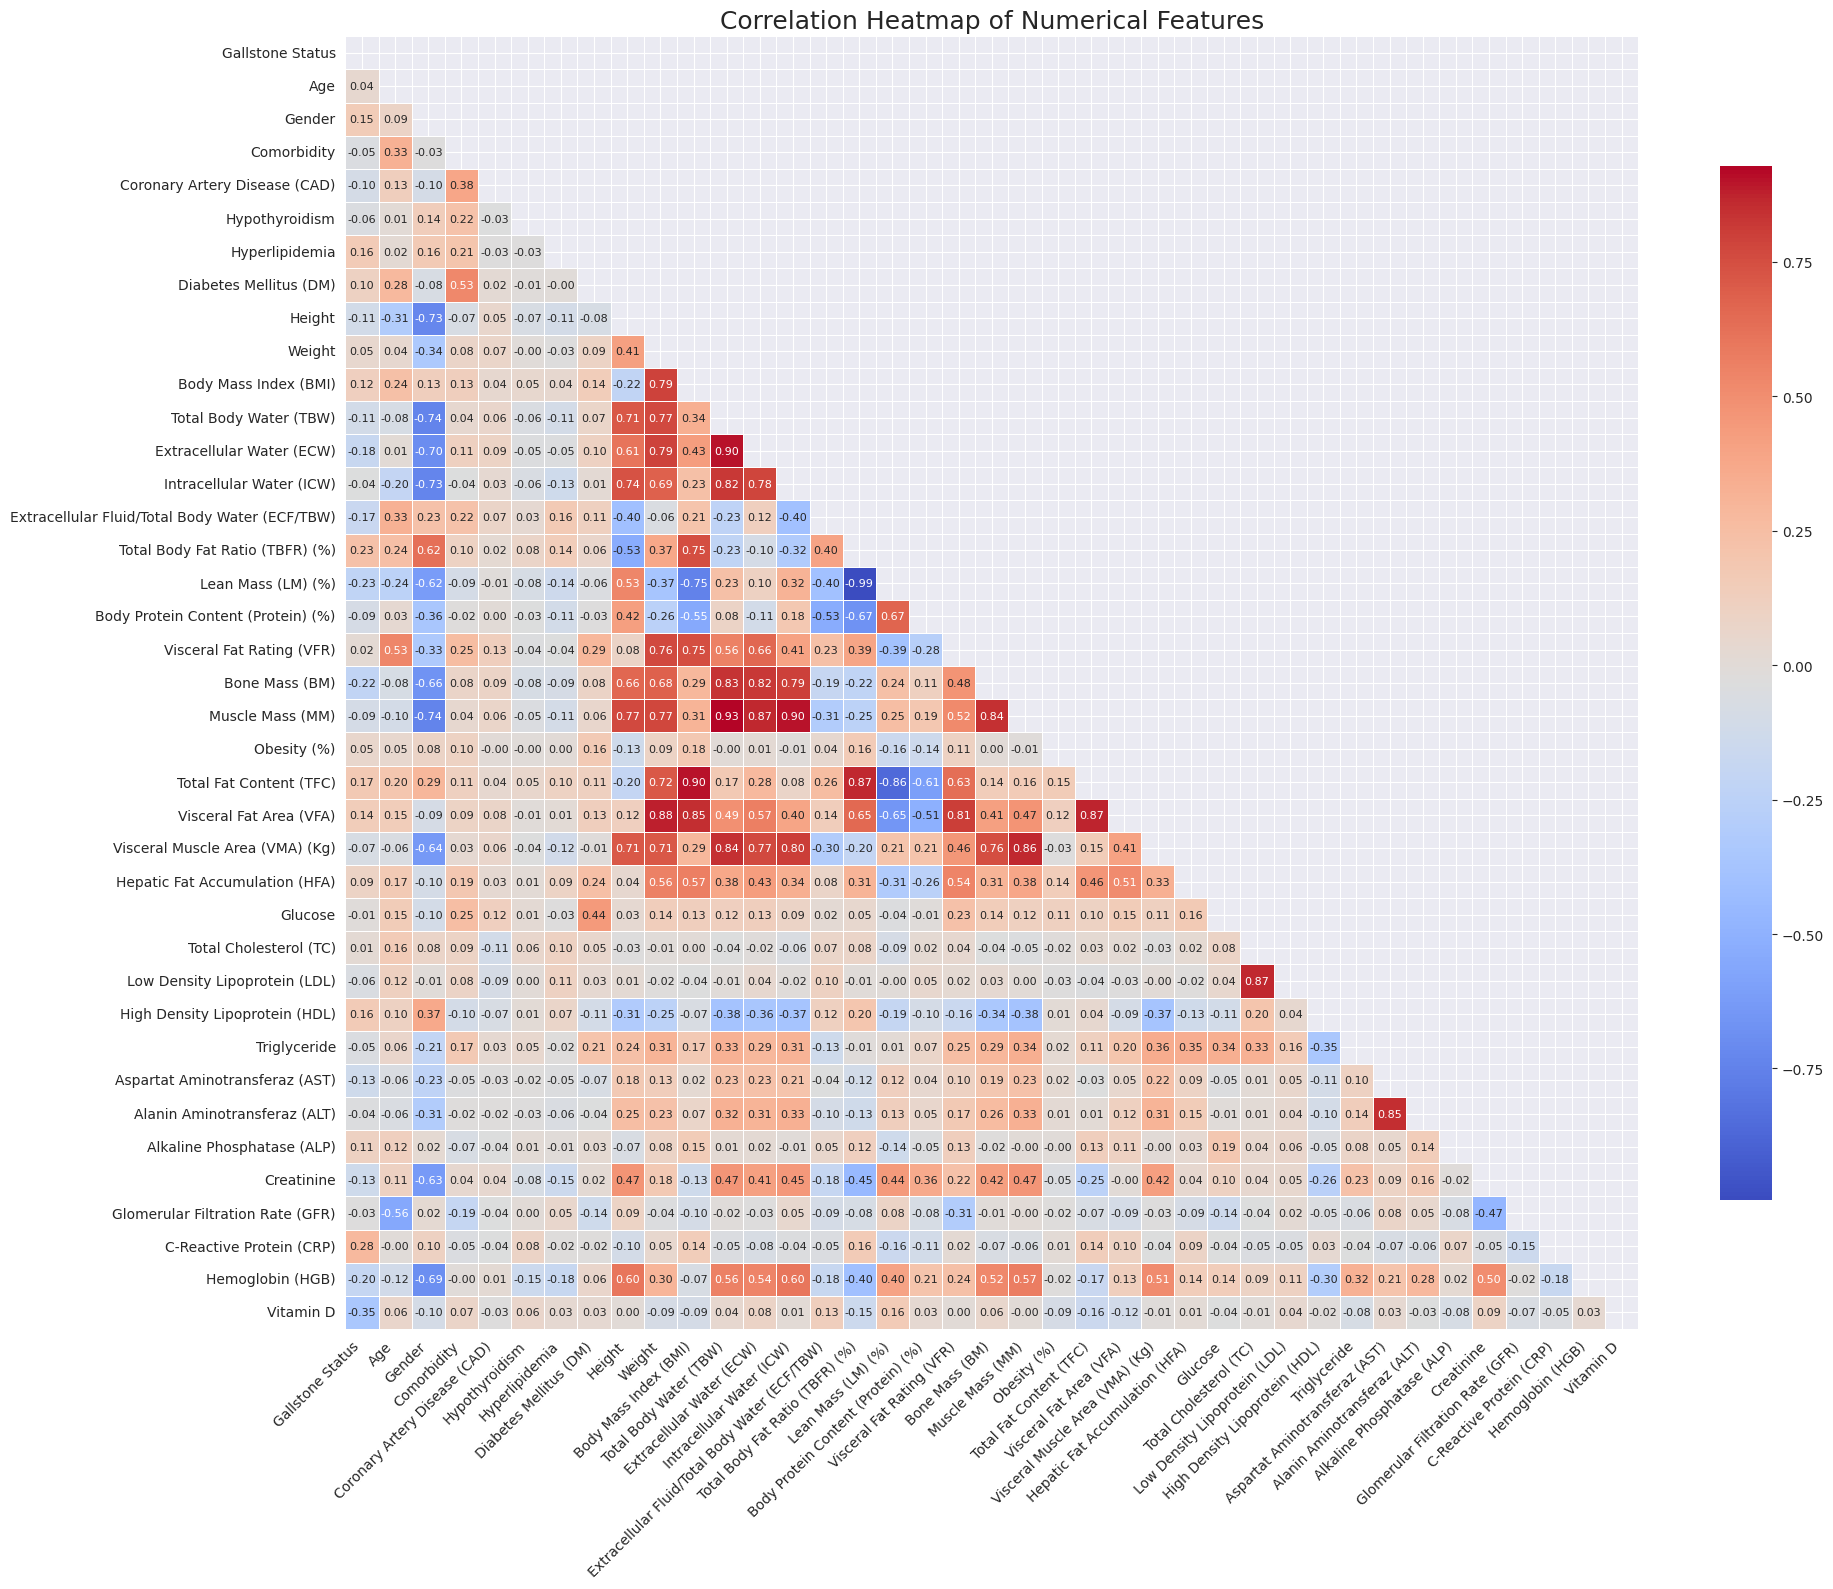

In [3]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])

corr_matrix = numerical_data.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(20, 16))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": .8},
    square=True,
    annot_kws={"size": 8}
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


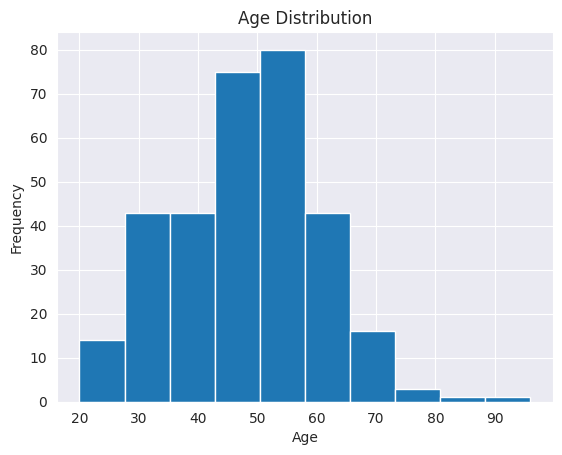

In [4]:
##Age distribution
data["Age"].plot(kind = "hist")
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show()


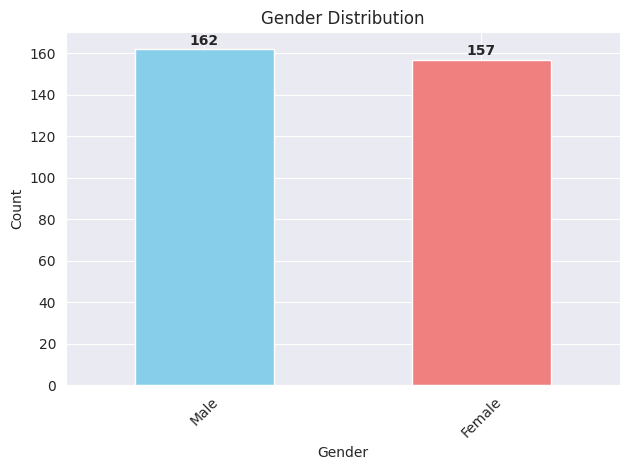

In [5]:
# Gender Distribution
ax = data["Gender"].value_counts().plot(kind="bar", color=["skyblue", "lightcoral"])

# Adding count labels on top of bars
for i, count in enumerate(data["Gender"].value_counts()):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customizing the plot
plt.xticks(ticks=[0, 1], labels=["Male", "Female"], rotation=45)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()

plt.show()

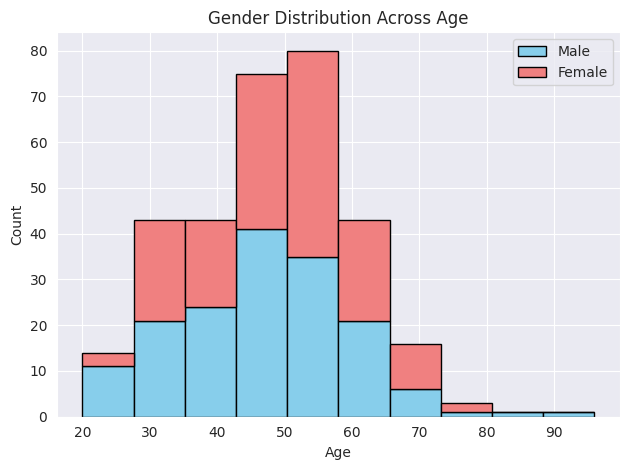

In [6]:
# Distribution of Gender over the age

# Split data by gender
male_ages = data[data['Gender'] == 0]['Age']
female_ages = data[data['Gender'] == 1]['Age']

# Plot
plt.hist([male_ages, female_ages], bins=10, stacked=True, label=['Male', 'Female'], color=['skyblue', 'lightcoral'], edgecolor='black')

plt.title("Gender Distribution Across Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


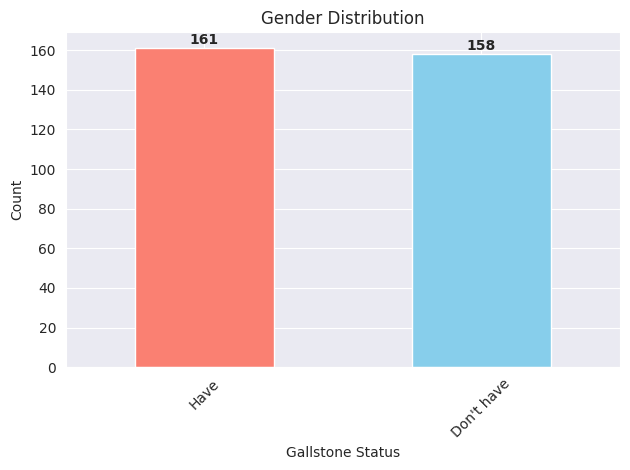

In [7]:
ax = data["Gallstone Status"].value_counts().plot(kind = "bar",  color=["salmon", "skyblue"])

for i, count in enumerate(data["Gallstone Status"].value_counts()):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(ticks=[0, 1], labels=["Have", "Don't have"], rotation=45)
plt.title("Gender Distribution")
plt.xlabel("Gallstone Status")
plt.ylabel("Count")
plt.tight_layout()

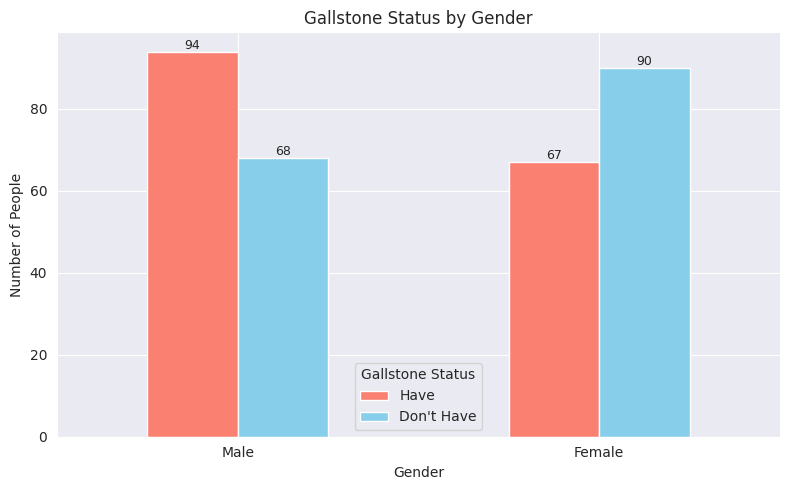

In [8]:
# Group and pivot the data
grouped = data.groupby(["Gender", "Gallstone Status"]).size().unstack(fill_value=0)

# Ensure correct column order: 0 = Have, 1 = Don't Have
grouped = grouped[[0, 1]]
grouped.columns = ["Have", "Don't Have"]

# Plot
ax = grouped.plot(kind='bar', stacked=False, color=["salmon", "skyblue"], figsize=(8, 5))

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

# Set titles and labels
plt.title("Gallstone Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.legend(title="Gallstone Status")
plt.xticks(ticks=[0, 1], labels=["Male", "Female"], rotation=0)
plt.tight_layout()

plt.show()


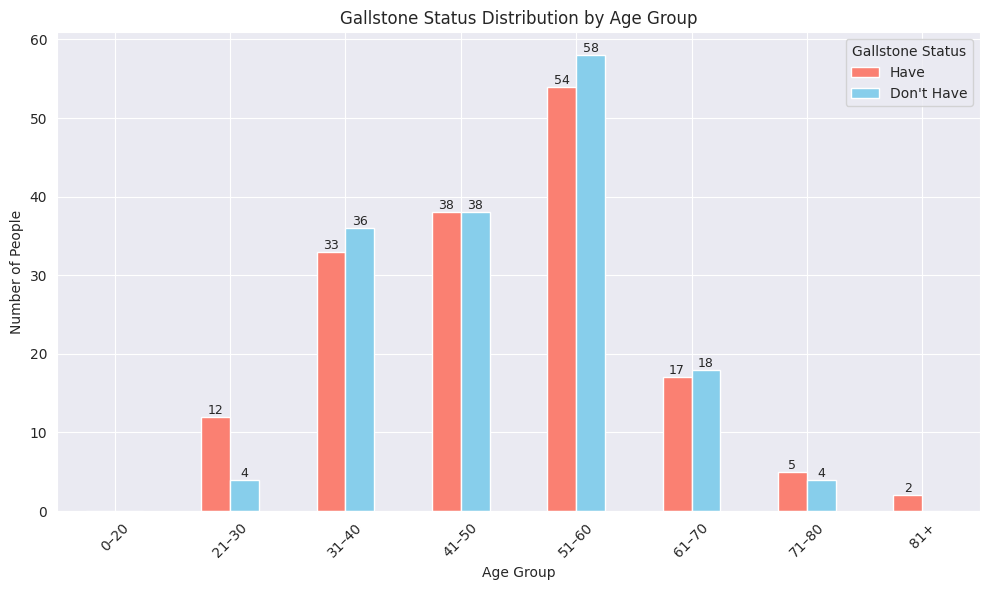

In [9]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['0–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

grouped = data.groupby(['AgeGroup', 'Gallstone Status'], observed=False).size().unstack(fill_value=0)

grouped = grouped[[0, 1]]
grouped.columns = ['Have', "Don't Have"]

ax = grouped.plot(kind='bar', stacked=False, color=['salmon', 'skyblue'], figsize=(10, 6))

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(str(int(height)),
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

plt.title("Gallstone Status Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.legend(title="Gallstone Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
data["Comorbidity"].value_counts()

Comorbidity
0    217
1     99
3      2
2      1
Name: count, dtype: int64

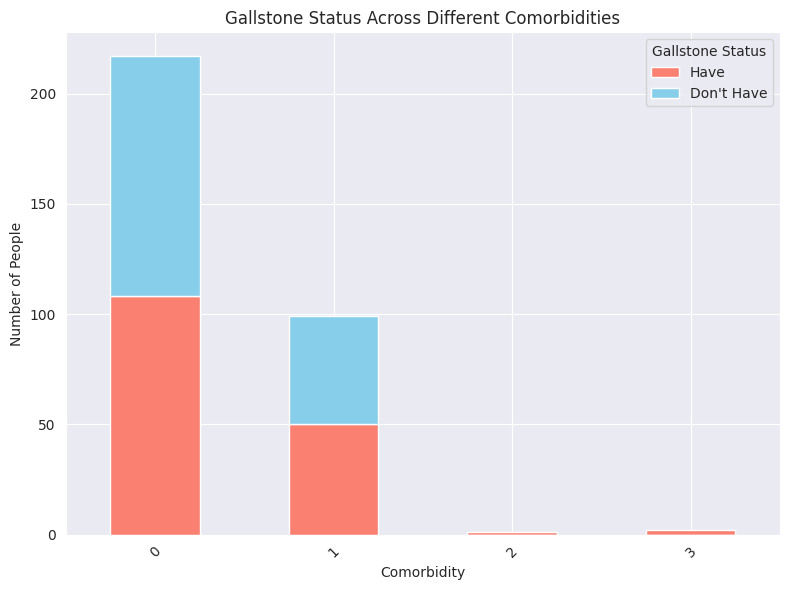

In [11]:
grouped = data.groupby(['Comorbidity', 'Gallstone Status']).size().unstack(fill_value=0)
grouped = grouped[[0, 1]]
grouped.columns = ['Have', "Don't Have"]

ax = grouped.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(8, 6))

plt.title("Gallstone Status Across Different Comorbidities")
plt.xlabel("Comorbidity")
plt.ylabel("Number of People")
plt.legend(title="Gallstone Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


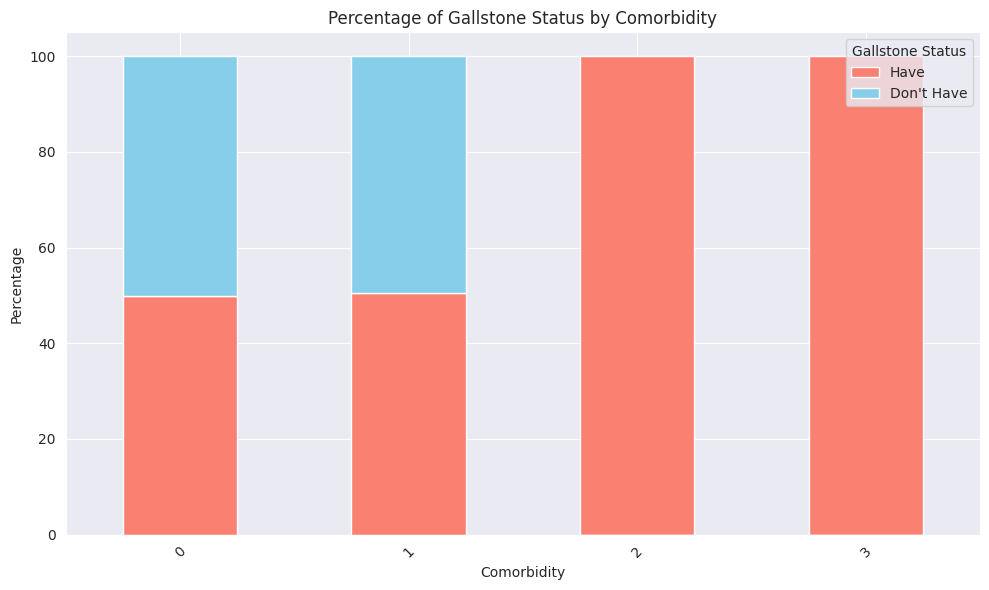

In [12]:
percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100
percentage.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(10, 6))

plt.title("Percentage of Gallstone Status by Comorbidity")
plt.ylabel("Percentage")
plt.xlabel("Comorbidity")
plt.legend(title="Gallstone Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


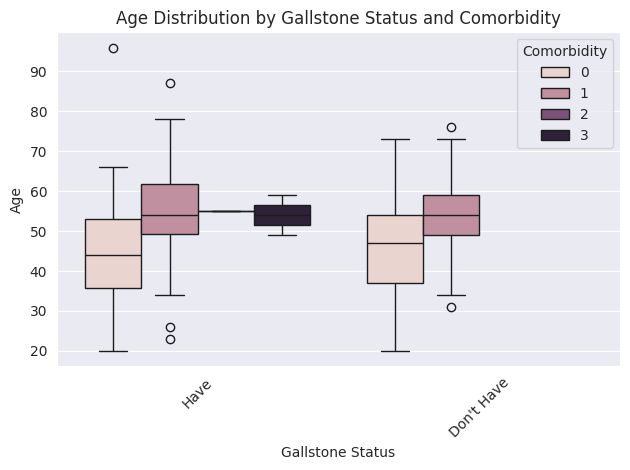

In [13]:
sns.boxplot(data=data, x='Gallstone Status', y='Age', hue='Comorbidity')
plt.title("Age Distribution by Gallstone Status and Comorbidity")
plt.xlabel("Gallstone Status")
plt.ylabel("Age")
plt.xticks(rotation=45, ticks = [0, 1], labels = ["Have", "Don't Have"])
plt.tight_layout()
plt.show()

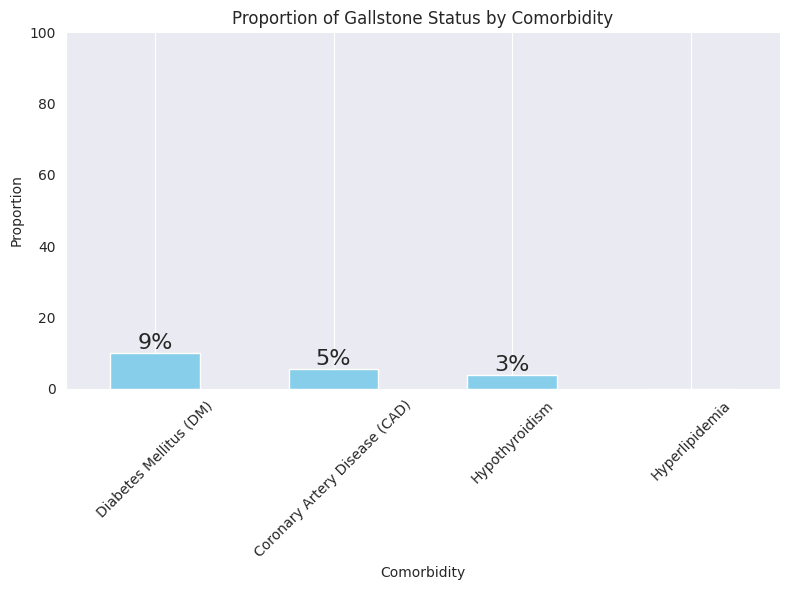

In [39]:
gallstone_positive = data[data["Gallstone Status"] == 0]
custom_list = ["Diabetes Mellitus (DM)", "Coronary Artery Disease (CAD)", "Hypothyroidism", "Hyperlipidemia"]

proportions = gallstone_positive[custom_list].mean().apply(lambda x: x * 100)

plt.figure(figsize = (8,6))
ax = proportions.plot(kind = "bar", color = "skyblue")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=16)

plt.title('Proportion of Gallstone Status by Comorbidity')
plt.xlabel("Comorbidity")
plt.ylabel("Proportion")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()


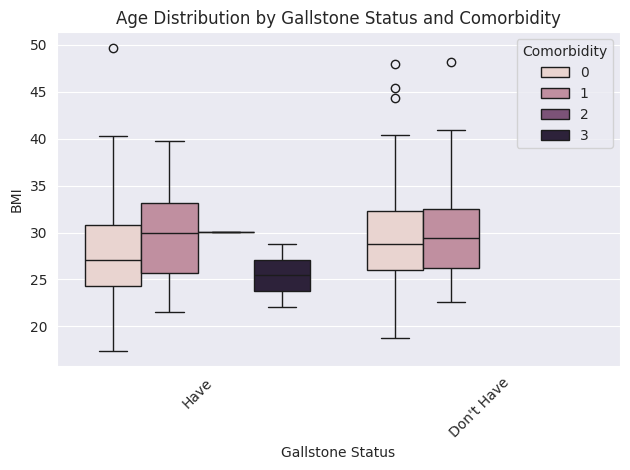

In [42]:
sns.boxplot(data=data, x='Gallstone Status', y='Body Mass Index (BMI)', hue='Comorbidity')
plt.title("Age Distribution by Gallstone Status and Comorbidity")
plt.xlabel("Gallstone Status")
plt.ylabel("BMI")
plt.xticks(rotation=45, ticks = [0, 1], labels = ["Have", "Don't Have"])
plt.tight_layout()
plt.show()

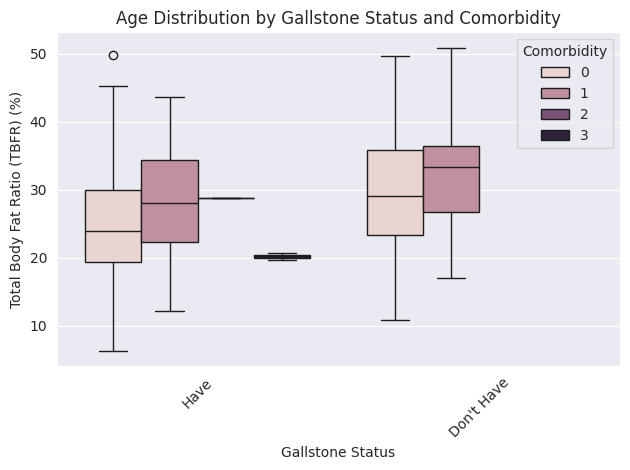

In [43]:
sns.boxplot(data=data, x='Gallstone Status', y='Total Body Fat Ratio (TBFR) (%)', hue='Comorbidity')
plt.title("Age Distribution by Gallstone Status and Comorbidity")
plt.xlabel("Gallstone Status")
plt.ylabel("Total Body Fat Ratio (TBFR) (%)")
plt.xticks(rotation=45, ticks = [0, 1], labels = ["Have", "Don't Have"])
plt.tight_layout()
plt.show()

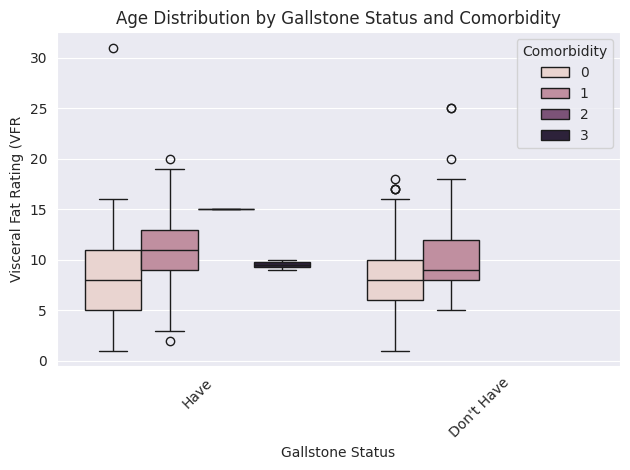

In [45]:
sns.boxplot(data=data, x='Gallstone Status', y = 'Visceral Fat Rating (VFR)', hue='Comorbidity')
plt.title("Age Distribution by Gallstone Status and Comorbidity")
plt.xlabel("Gallstone Status")
plt.ylabel("Visceral Fat Rating (VFR")
plt.xticks(rotation=45, ticks = [0, 1], labels = ["Have", "Don't Have"])
plt.tight_layout()
plt.show()